In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import contractions
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\punpo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\punpo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Load the data 
review_df = pd.read_csv('amazon_alexa.tsv', sep ='\t')
review_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
review_df["length"] = review_df['verified_reviews'].apply(len)


In [5]:
review_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<AxesSubplot: xlabel='rating', ylabel='count'>

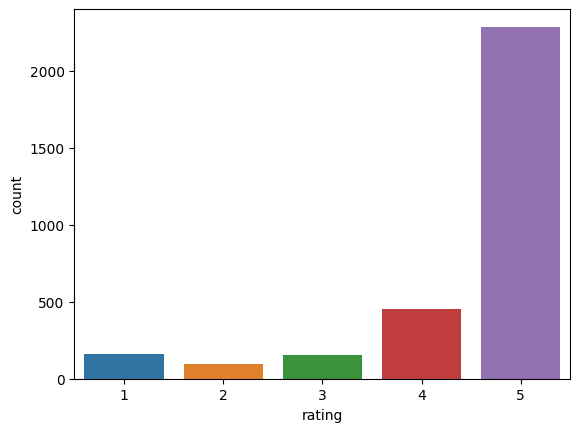

In [6]:
sns.countplot(x = review_df["rating"])

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


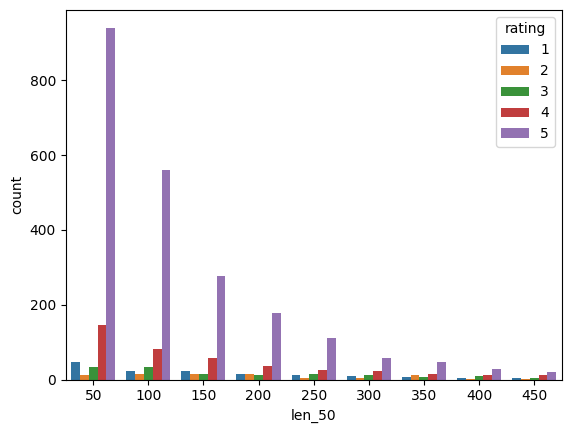

In [7]:
review_df["len_50"] = (review_df['verified_reviews'].apply(len)//50)*50 + 50
sns.countplot(x = review_df["len_50"].loc[review_df['len_50'] < 10*50], hue  = review_df["rating"].loc[review_df['len_50'] < 10*50])
review_df.drop(["len_50"], axis=1)

In [8]:
review_df[review_df['length'] == 2851]["verified_reviews"].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [9]:
def delete_puncNstop(massage):
    import string
    stopwords = nltk.corpus.stopwords.words('english')
    
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', massage)
    return([word for word in text.split() if word.lower not in stopwords])
def join_massage(Listmassage):
    return(" ".join(Listmassage))
def remove_contract(massage):
    return(contractions.fix(massage))

In [10]:
review_df['cleaned_reviews'] = review_df['verified_reviews'].apply(delete_puncNstop).apply(join_massage).apply(remove_contract)

In [11]:
'''from wordcloud import WordCloud
FiveStar_review_as_one = review_df['cleaned_reviews'].loc[review_df['rating'] == 5].apply(join_massage)
FiveStar_review_as_one = " ".join(FiveStar_review_as_one)
plt.imshow(WordCloud().generate(FiveStar_review_as_one))'''

'from wordcloud import WordCloud\nFiveStar_review_as_one = review_df[\'cleaned_reviews\'].loc[review_df[\'rating\'] == 5].apply(join_massage)\nFiveStar_review_as_one = " ".join(FiveStar_review_as_one)\nplt.imshow(WordCloud().generate(FiveStar_review_as_one))'

In [12]:
import sys
print(sys.executable)

c:\Users\punpo\AppData\Local\Programs\Python\Python311\python.exe


This is a non sequence feature (cbow feature)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(review_df['cleaned_reviews'])
print(vectorizer.get_feature_names_out())

['072318' '10' '100' ... 'zwave' 'zzzz' 'zzzzzzz']


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(countvectorizer, review_df['rating'], test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score

RF_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
NB_model = MultinomialNB()
LR_model = LogisticRegression(random_state=0)

models = [
    RF_model,
    NB_model,
    LR_model
]
models_name = [
    "RF_model",
    "NB_model",
    "LR_model"
]

model_collections = {}
for index in range(len(models)) :
    models[index].fit(x_train, y_train)
    y_predict_test = models[index].predict(x_test)
    model_collections[models_name[index]] = [models[index],y_predict_test]

c:\Users\punpo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
for index in range(len(models_name)) :
    print(models_name[index])
    print(classification_report(y_test, model_collections[models_name[index]][1]))

RF_model
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        77
           5       0.75      1.00      0.85       470

    accuracy                           0.75       630
   macro avg       0.15      0.20      0.17       630
weighted avg       0.56      0.75      0.64       630

NB_model
              precision    recall  f1-score   support

           1       1.00      0.19      0.32        32
           2       0.00      0.00      0.00        17
           3       0.67      0.06      0.11        34
           4       0.36      0.30      0.33        77
           5       0.83      0.97      0.89       470

    accuracy                           0.78       630
   macro avg       0.57      0.30      0.33       630
weighted avg       0.75      0.78      0.73       630

LR_m

c:\Users\punpo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\punpo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\punpo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Text(0.5, 23.52222222222222, 'Predicted')

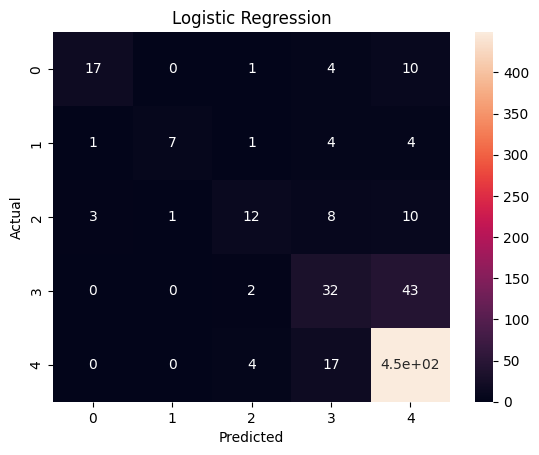

In [17]:
cm = confusion_matrix(y_test, model_collections["LR_model"][1])
sns.heatmap(cm, annot=True)
plt.title("Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [18]:
def process_glove_line(line, dim):
    word = None
    embedding = None

    try:
        splitLine = line.split()
        word = " ".join(splitLine[:len(splitLine)-dim])
        embedding = np.array([float(val) for val in splitLine[-dim:]])
    except:
        print(line)

    return word, embedding

def load_glove_model(glove_filepath, dim):
    with open(glove_filepath, encoding="utf8" ) as f:
        content = f.readlines()
        model = {}
        for line in content:
            word, embedding = process_glove_line(line, dim)
            if embedding is not None:
                model[word] = embedding
        return model

dict_word = load_glove_model(r"G:\project\glove_en_300d\glove.840B.300d.txt", 300)

In [19]:
import keras
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
#set tokenizer to know all word
tokenizer.fit_on_texts(review_df['cleaned_reviews'])
#set sequences
sequences = tokenizer.texts_to_sequences(review_df['cleaned_reviews'])
#padding
sequences = keras.utils.pad_sequences(sequences, padding='post')
sequences = np.array(sequences)
print(sequences)
#(tokenizer.word_index)

[[ 11   7  13 ...   0   0   0]
 [255   4   0 ...   0   0   0]
 [289 176 173 ...   0   0   0]
 ...
 [  2  34  11 ...   0   0   0]
 [ 91 895   2 ...   0   0   0]
 [ 50   0   0 ...   0   0   0]]


In [20]:
test =  pd.DataFrame(sequences)
longest_text = np.array(test[test.iloc[:, 524]!=0])
# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
# Creating texts 
text = tokenizer.sequences_to_texts(longest_text)
"".join(text[0])
print(test.index[test.iloc[:, 524]!=0].tolist())


[2016]


In [21]:
dataset = []
for i in range(3150):
    sentence_em = np.zeros([300,525]) #dataset[0][:,1].shape
    z = review_df['cleaned_reviews'].loc[i].split(" ")
    z += ["umknowcahrlectorAAA"] * (525 - len(z))
    for j in range(525):
        if z[j] in dict_word:
            sentence_em[:,j] = dict_word[z[j]].T
        else:
        #If the word is not in the vocabulary, append a random vector
            sentence_em[:,j] = np.zeros([300])
            #sentence_em[:,j] = np.random.normal(scale=0.6, size=(300,)).T /20
    dataset.append(sentence_em)

Text(0.5, 1.0, 'representation of longest review')

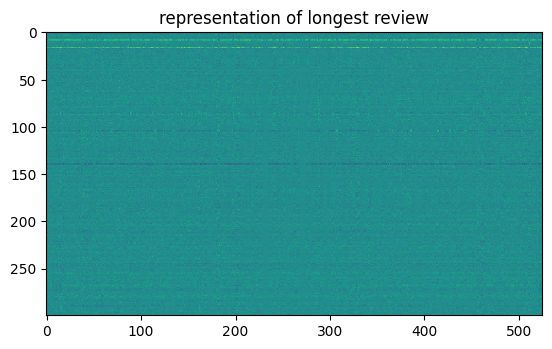

In [22]:
plt.imshow(dataset[2016])
plt.title("representation of longest review")

In [23]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

data = {'data': dataset, 'rating': review_df['rating'] }
import torch

# Split the data into train and test sets while preserving the rating correspondence
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['rating'], test_size=0.2, random_state=42)





In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

class Net(nn.Module):
    def __init__(self, num_filters=32, kernel_size=3, num_hidden=64):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,num_filters, kernel_size)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(num_filters, num_filters * 2, kernel_size)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(num_filters * 2 * 73 * 129, num_hidden)
        self.fc2 = nn.Linear(num_hidden, 5)
        self.num_filters = num_filters

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, self.num_filters * 2 * 73 * 129)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = nn.functional.softmax(x, dim=1)
        return x

In [25]:
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
# Define the parameter search space
params = {'num_filters': [16, 32, 64], 'kernel_size': [3, 5], 'num_hidden': [64, 128]}

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train).unsqueeze(1).float()
y_train = torch.tensor(np.array(y_train))
X_test = torch.tensor(X_test).unsqueeze(1).float()
y_test = torch.tensor(np.array(y_test))

# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoaders
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set up early stopping
early_stop = {'patience': 5, 'counter': 0, 'best_loss': float('inf')}

train_losses = []
train_accs = []

# Train the best model
num_epochs = 10

criterion = nn.CrossEntropyLoss()
loss_fn = nn.CrossEntropyLoss()

model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

C:\Users\punpo\AppData\Local\Temp\ipykernel_17992\1207808072.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  X_train = torch.tensor(X_train).unsqueeze(1).float()


In [63]:
for epoch in range(num_epochs): 
    total_correct = 0
    with tqdm(train_dataloader, unit="batch") as tepoch:
        for images, labels in tepoch:
            loss = 0
            tepoch.set_description(f"Epoch {epoch}")
            # Zero out the gradients
            optimizer.zero_grad()
            
            # Forward pass
            y = model(images)
            loss = criterion(y, labels-1)
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            tepoch.set_postfix(loss=loss.item())

    #early stop
    with torch.no_grad():
        # Forward pass    
        val_loss = 0
        for x, y in test_dataloader:
            y_pred = model(x)
            total_correct += (y_pred.argmax(1) == y-1).sum().item()
            val_loss += loss_fn(y_pred, y-1)
            val_loss /= len(test_dataloader)
                
        # Check if the validation loss has improved
        if val_loss < early_stop['best_loss']:
            early_stop['best_loss'] = val_loss                
            early_stop['counter'] = 0
        else:
            early_stop['counter'] += 1
            if early_stop['counter'] >= early_stop['patience']:
                print("Early stopping after {} epochs".format(epoch))
                break
        
    train_acc = total_correct / 630 #ขนาด test
    train_losses.append(val_loss)
    train_accs.append(train_acc)
    print(f"Epoch {epoch+1}: val_loss ={val_loss:.4f}, train_acc={train_acc:.4f}")
    
# Plot the training loss and accuracy
epochs = range(1, len(train_losses)+1)
#plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, train_accs, 'r', label='Training accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

  0%|          | 0/79 [00:00<?, ?batch/s]

RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 638377984 bytes.

In [62]:
val_loss = 0
for x, y in test_dataloader:
    y_pred = model(x)
    total_correct += (y_pred.argmax(1) == y-1).sum().item()
    val_loss += loss_fn(y_pred, y-1)
    val_loss /= len(test_dataloader)

RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 638377984 bytes.